<a href="https://colab.research.google.com/github/kiplimo07/Health-Costs/blob/main/health_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-07-30 05:23:55--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.02s   

2024-07-30 05:23:55 (3.11 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [12]:
# Separate the features and target variable
X = dataset.drop(columns='expenses')
y = dataset['expenses']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# One-hot encode categorical data
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(X[categorical_cols])

# Combine encoded categorical data and numerical data
X_numerical = X[numerical_cols].values
X_combined = np.concatenate([X_encoded, X_numerical], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_combined.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2,batch_size =32, verbose=2)

# Prepare test_dataset and test_labels for evaluation
test_dataset = X_test
test_labels = y_test

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


27/27 - 1s - loss: 322724896.0000 - mae: 13422.3018 - mse: 322724896.0000 - val_loss: 301621664.0000 - val_mae: 12334.9512 - val_mse: 301621664.0000 - 1s/epoch - 43ms/step
Epoch 2/100
27/27 - 0s - loss: 290733824.0000 - mae: 12201.0244 - mse: 290733824.0000 - val_loss: 230454096.0000 - val_mae: 9466.5947 - val_mse: 230454096.0000 - 88ms/epoch - 3ms/step
Epoch 3/100
27/27 - 0s - loss: 175616512.0000 - mae: 8685.0703 - mse: 175616512.0000 - val_loss: 131332232.0000 - val_mae: 9205.1357 - val_mse: 131332232.0000 - 91ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 131841024.0000 - mae: 9489.1445 - mse: 131841024.0000 - val_loss: 130007392.0000 - val_mae: 8521.7637 - val_mse: 130007392.0000 - 97ms/epoch - 4ms/step
Epoch 5/100
27/27 - 0s - loss: 132156968.0000 - mae: 8739.7725 - mse: 132156968.0000 - val_loss: 129442376.0000 - val_mae: 9074.3320 - val_mse: 129442376.0000 - 96ms/epoch - 4ms/step
Epoch 6/100
27/27 - 0s - loss: 131770632.0000 - mae: 9301.4062 - mse: 131770632.0000 - val_loss

9/9 - 0s - loss: 26131814.0000 - mae: 3314.1340 - mse: 26131814.0000 - 31ms/epoch - 3ms/step
Testing set Mean Abs Error: 3314.13 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


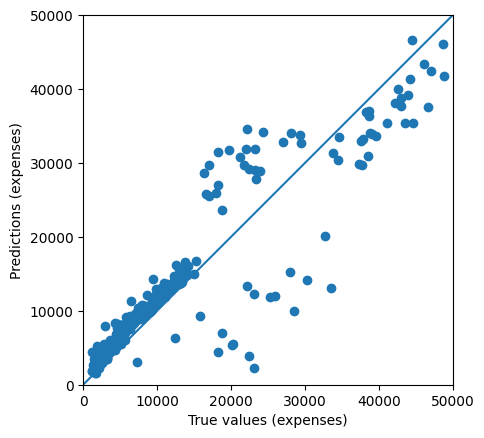

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
